<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E6%8B%89%E6%A0%BC%E6%9C%97%E6%97%A5%E5%87%BD%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import warnings;warnings.simplefilter('ignore')

# obj_function

In [0]:
def Φ(x,y,λ):
  term_1 = (x**2)*y
  term_2 = λ*(x**2+y**2-1)
  return  term_1 + term_2 

## ANN method

# build net

In [3]:
import torch
from torch.nn import Linear,init,Sigmoid,Tanh
import torch.optim as optim


def build_net(input_shape,output_shape):
  net = torch.nn.Sequential(
      Linear(input_shape,output_shape),
      Tanh(),
      )
  return net

def init_weights(m):
  if type(m) == Linear:
    torch.nn.init.xavier_uniform(m.weight)
    m.bias.data.fill_(0)

net = build_net(1,3)
net.apply(init_weights)
net

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): Tanh()
)

# noise_iter

In [4]:
noise = torch.tensor(np.random.normal(size=(1,1)), dtype=torch.float)
noise_datasets = torch.utils.data.TensorDataset(noise)
noise_iter = torch.utils.data.DataLoader(noise_datasets,batch_size=1)
noise_iter

## optimizer

In [0]:
optimizer = optim.Adam(net.parameters(),lr=0.05)

# obj

In [0]:
def obj_function(x,y,λ):
  Loss = 0
  N = len(x)
  for xi,yi,λi in zip(x,y,λ):
    Loss += Φ(xi,yi,λi)
  return Loss/N

# train loop

In [0]:
def train(net,noise_iter,obj_function,optimizer,num_epochs=50):
  history = []
  for epoch in range(num_epochs):
    for noise in noise_iter:
      z = net(noise[0])
      x,y,λ = z[:,0],z[:,1],z[:,2]
      loss = obj_function(x,y,λ)
      loss.mean().backward()
      optimizer.step()
      optimizer.zero_grad()
    # end one epochs
    print("epochs {} loss {:.4f}".format(epoch,loss.item()))
    history.append(loss.item())
  # end all epochs
  plt.plot(np.array(history))
  plt.title('train loss')
  return net

epochs 0 loss 0.1160
epochs 1 loss 0.0202
epochs 2 loss -0.0815
epochs 3 loss -0.1827
epochs 4 loss -0.2772
epochs 5 loss -0.3603
epochs 6 loss -0.4313
epochs 7 loss -0.4932
epochs 8 loss -0.5490
epochs 9 loss -0.6001
epochs 10 loss -0.6477
epochs 11 loss -0.6928
epochs 12 loss -0.7354
epochs 13 loss -0.7743
epochs 14 loss -0.8078
epochs 15 loss -0.8345
epochs 16 loss -0.8542
epochs 17 loss -0.8683
epochs 18 loss -0.8795
epochs 19 loss -0.8906
epochs 20 loss -0.9029
epochs 21 loss -0.9154
epochs 22 loss -0.9266
epochs 23 loss -0.9353
epochs 24 loss -0.9412
epochs 25 loss -0.9451
epochs 26 loss -0.9481
epochs 27 loss -0.9512
epochs 28 loss -0.9548
epochs 29 loss -0.9587
epochs 30 loss -0.9626
epochs 31 loss -0.9660
epochs 32 loss -0.9685
epochs 33 loss -0.9702
epochs 34 loss -0.9712
epochs 35 loss -0.9722
epochs 36 loss -0.9734
epochs 37 loss -0.9750
epochs 38 loss -0.9767
epochs 39 loss -0.9781
epochs 40 loss -0.9792
epochs 41 loss -0.9799
epochs 42 loss -0.9804
epochs 43 loss -0.9809


Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): Tanh()
)

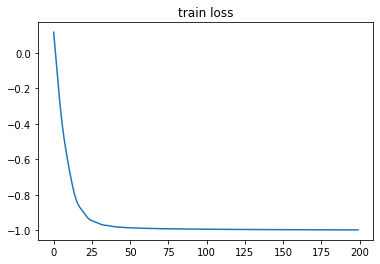

In [8]:
train(net,noise_iter,obj_function,optimizer,200)

In [15]:
x,y,λ = net(noise[0]).detach().numpy()
print(x,y,λ)
print(round(x,2),round(y,2),round(λ,2))
print(Φ(x,y,λ))

6.914139e-06 7.674098e-06 0.9969011
0.0 0.0 1.0
-0.9969010948071159
